In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt



In [2]:
PATH = './data/'
FEATURES_PATH = PATH + 'features.csv'
STORES_PATH = PATH + 'stores.csv'
TRAIN_PATH = PATH + 'train.csv'
TEST_PATH = PATH + 'test.csv'

In [3]:
train_df = pd.read_csv(TRAIN_PATH)
features_df = pd.read_csv(FEATURES_PATH)
stores_df = pd.read_csv(STORES_PATH)
test_df = pd.read_csv(TEST_PATH)

In [4]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


## Combine all the data into one table

In [5]:
one_df_to_rule_them_all = train_df.merge(stores_df, how='left').merge(features_df, how='left')

In [6]:
one_df_to_rule_them_all.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [7]:
one_ruler = one_df_to_rule_them_all

(1, 1)
(143, 16)


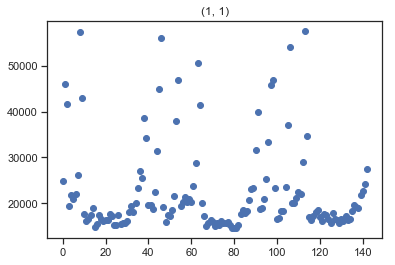

(1, 2)
(143, 16)


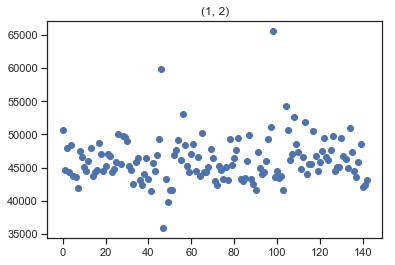

(1, 3)
(143, 16)


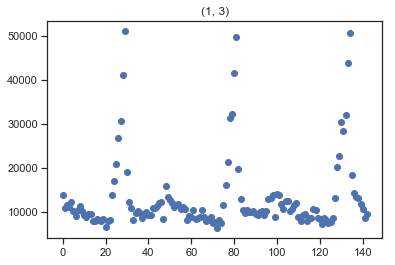

(1, 4)
(143, 16)


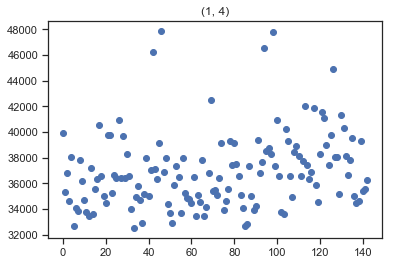

(1, 5)
(143, 16)


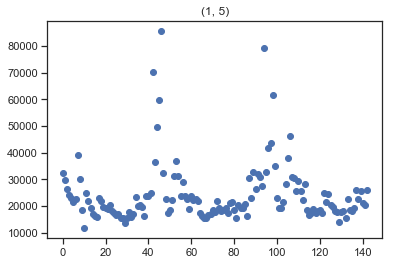

(1, 6)
(143, 16)


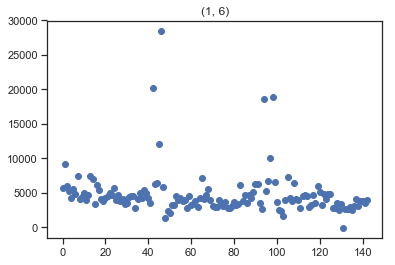

(1, 7)
(143, 16)


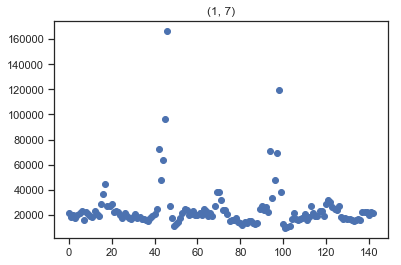

(1, 8)
(143, 16)


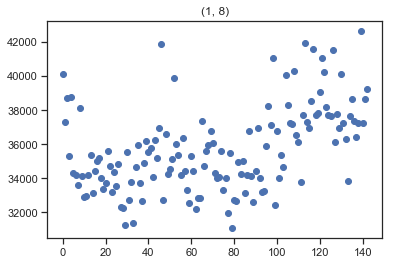

(1, 9)
(143, 16)


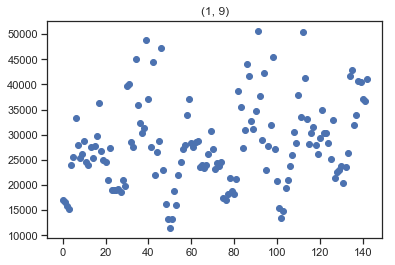

(1, 10)
(143, 16)


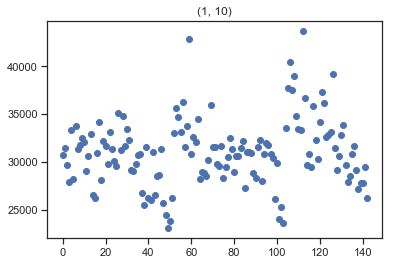

(1, 11)
(143, 16)


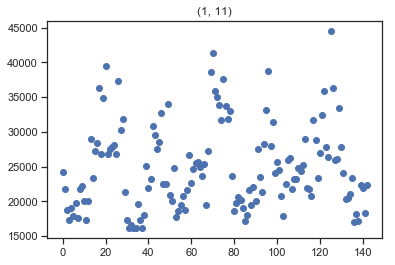

(1, 12)
(143, 16)


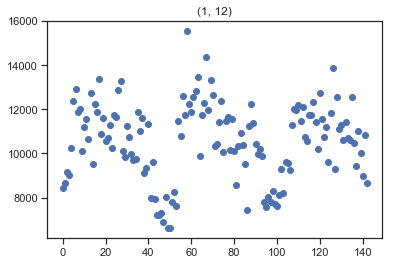

In [8]:
cnt = 0
for name, group in one_ruler.groupby(["Store", "Dept"]):
    print(name)
    plt.title(name)
    print(group.shape)
    group = group.sort_values(by=['Date'])
    plt.scatter(range(len(group)), group["Weekly_Sales"])
    plt.show()
    if cnt > 10:
        break
    cnt += 1

In [9]:
one_ruler.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

## Let's first analyze the distribution of the data

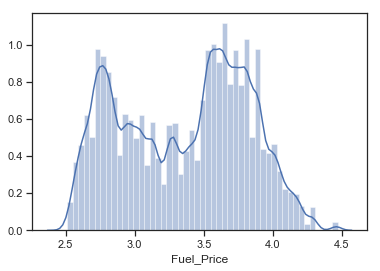

In [16]:
sns.distplot(one_ruler['Fuel_Price'])

### We can see that most on the data contains fuel price within the range of (2.5,4.3)

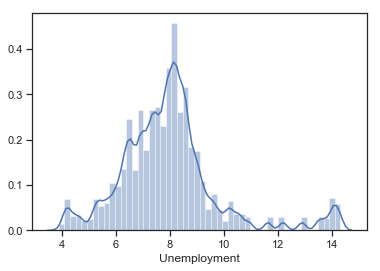

In [17]:
sns.distplot(one_ruler['Unemployment'])

### The unemployeement data is also not balanced, the peak is at 8%

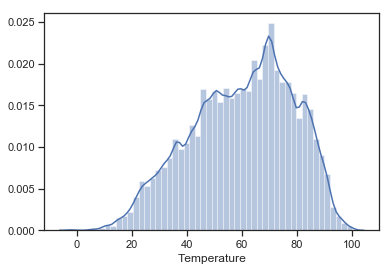

In [18]:
sns.distplot(one_ruler['Temperature'])

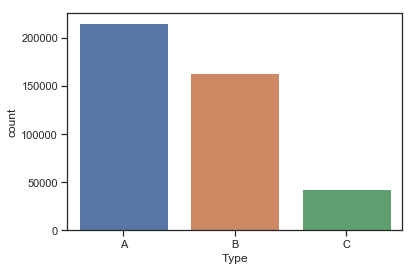

In [19]:
sns.countplot(one_ruler['Type'])

### Stores types are very different, there are much more type A stores than type C stores.

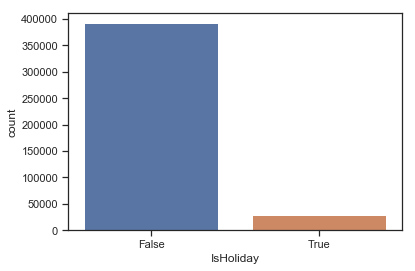

In [20]:
sns.countplot(one_ruler['IsHoliday'])

##  Now let's look at relations between different features and weekly sales

In [10]:
def scatter_(df, column):
    plt.figure(figsize=(16,9))
    plt.scatter(df[column] , df['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

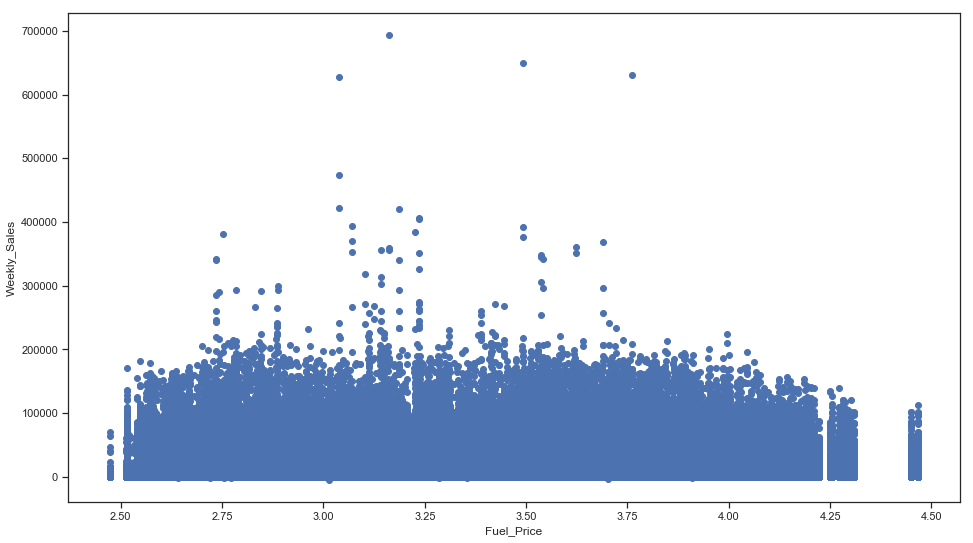

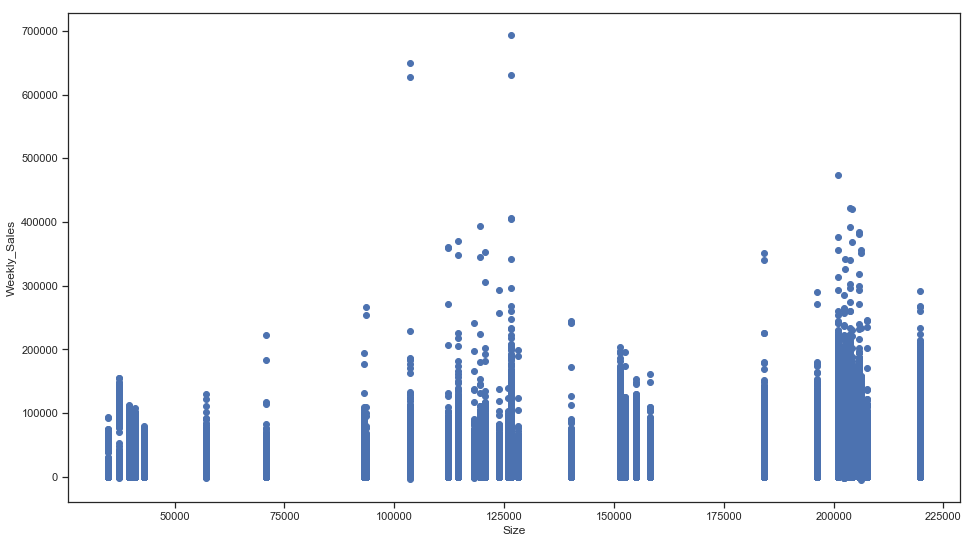

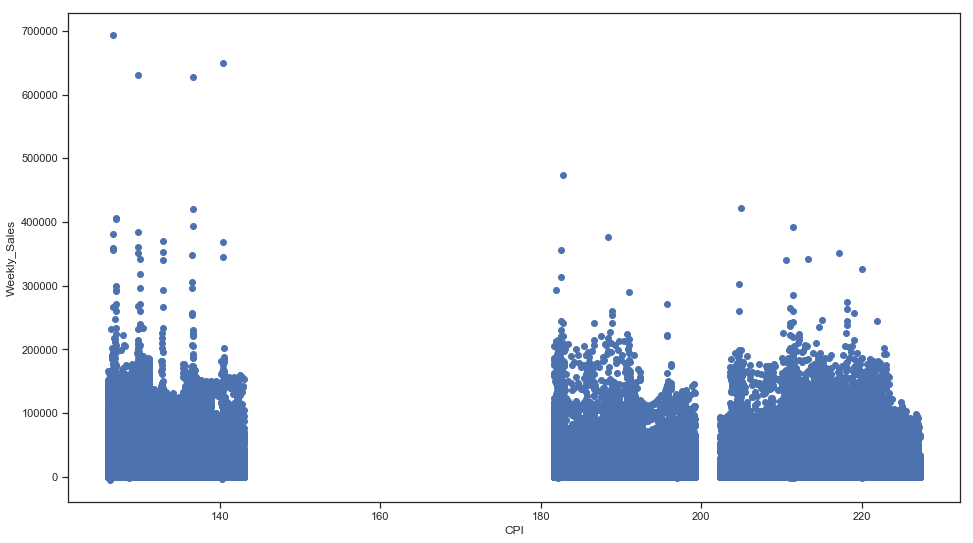

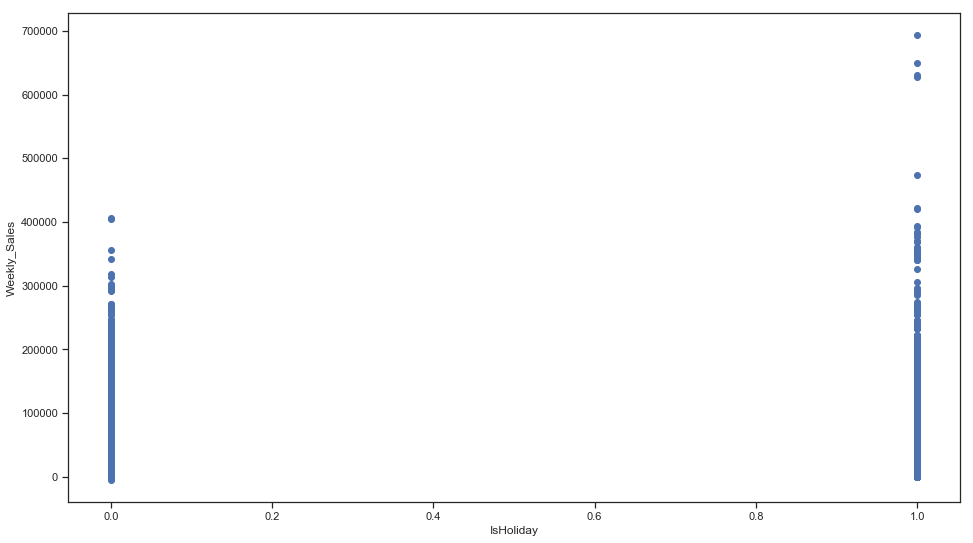

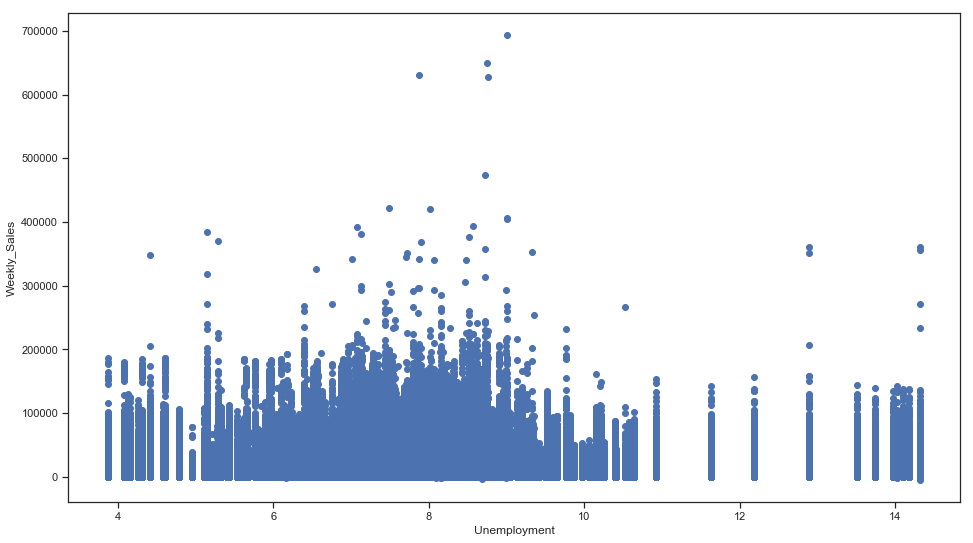

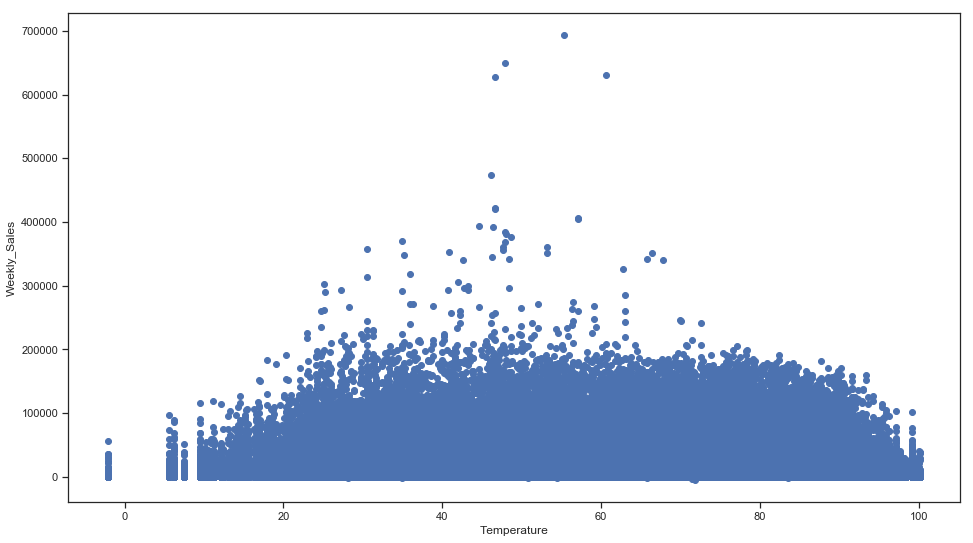

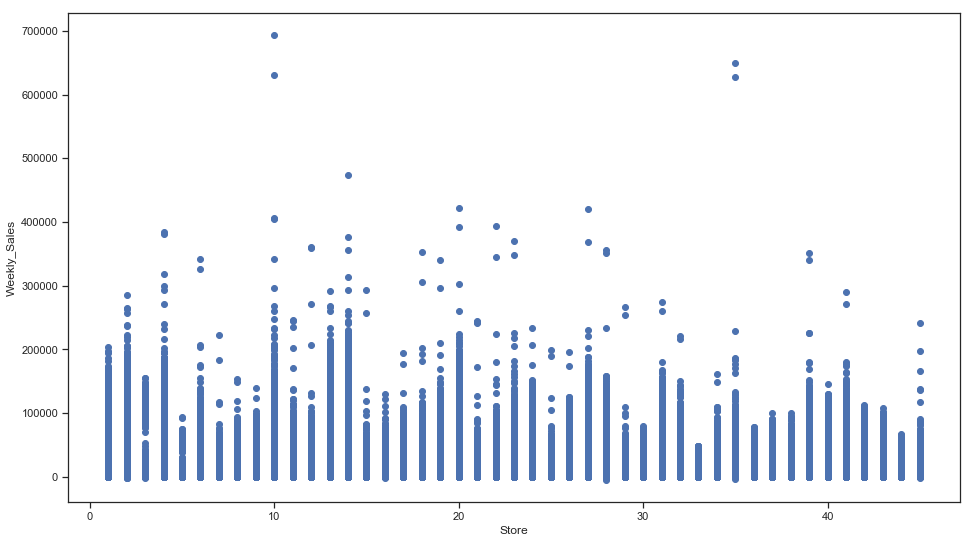

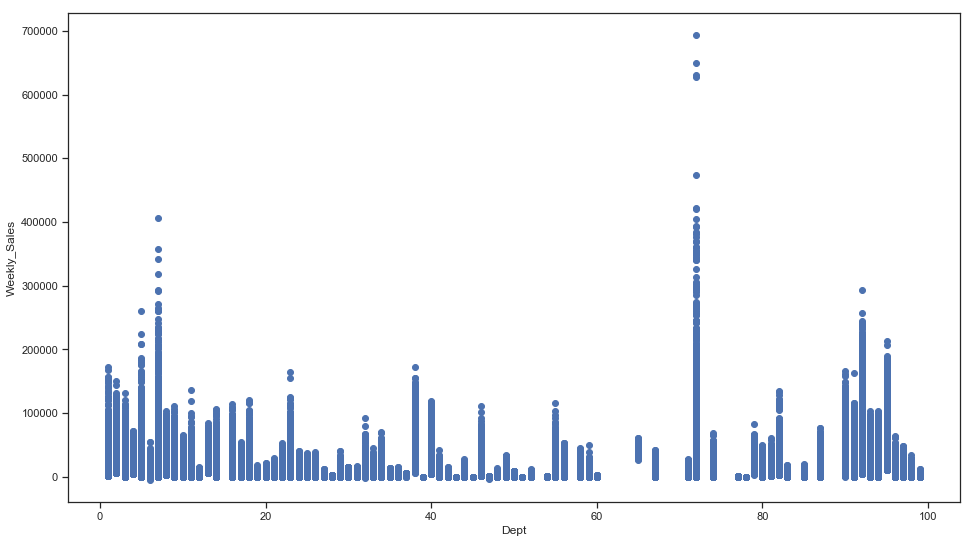

In [11]:
scatter_(one_ruler, 'Fuel_Price')
scatter_(one_ruler, 'Size')
scatter_(one_ruler, 'CPI')
#scatter_(one_ruler, 'Type')
scatter_(one_ruler, 'IsHoliday')
scatter_(one_ruler, 'Unemployment')
scatter_(one_ruler, 'Temperature')
scatter_(one_ruler, 'Store')
scatter_(one_ruler, 'Dept')

### Although the graph is a bit messy because there are too many data points, we can see that peaks sales are usually assoiciated with low unemployeedment, mid-range temporatures and low CPIs.

### Next we analyze the correlation coefficient between differen features

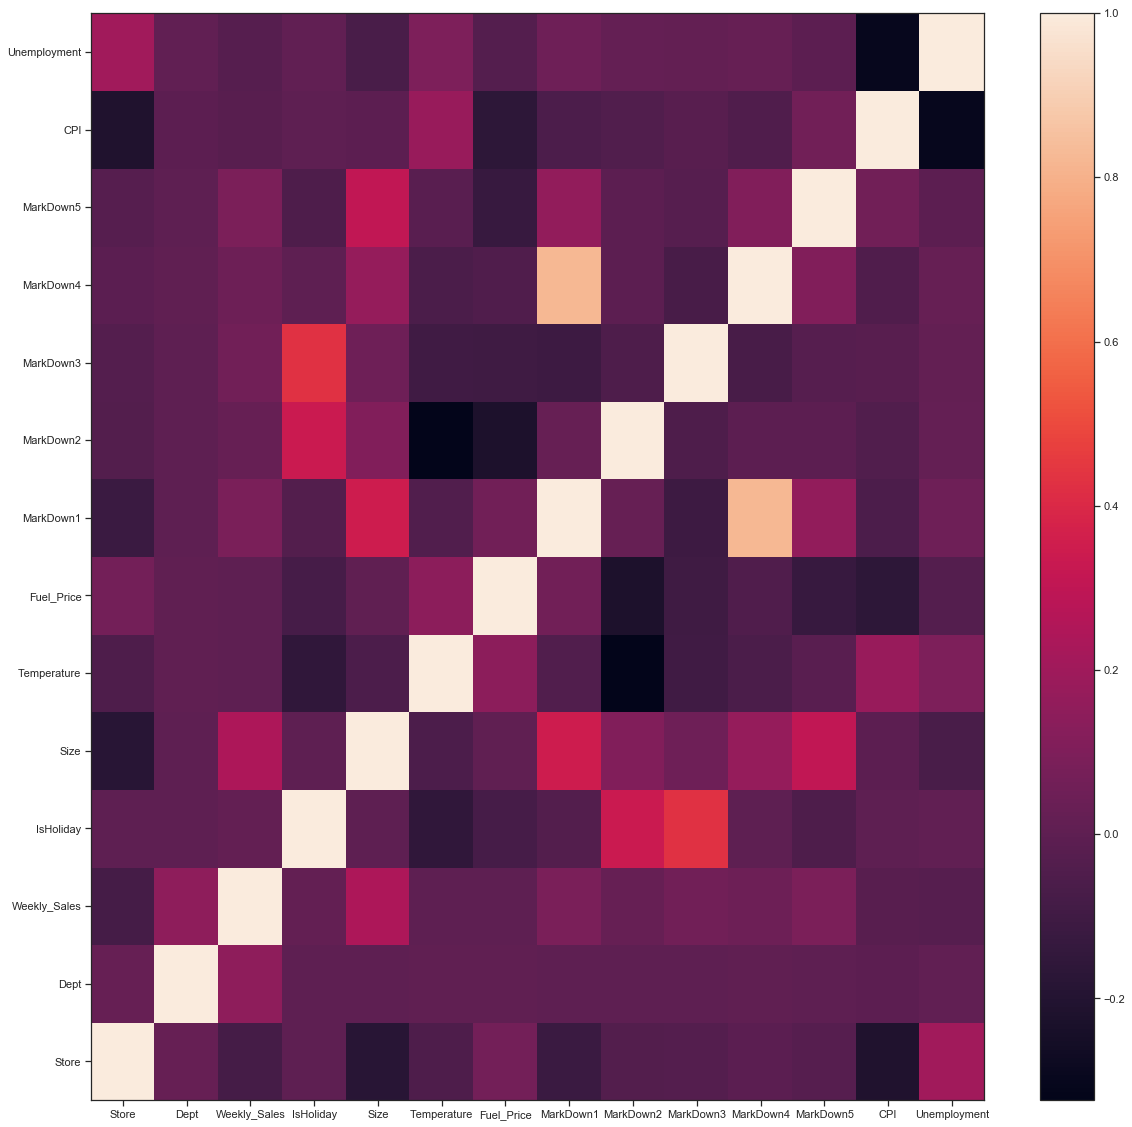

In [13]:
fig = plt.figure(figsize=(20, 20))
corr = one_ruler.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

## We particular focus on the correlation between weekly sales and other factors. It appears that the size of the store is very relavant to the weekly sales